<a href="https://colab.research.google.com/github/dimitarpg13/langchain_tutorial/blob/main/langchain_tutorial/notebooks/getting_started/GettingStarted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U langgraph langsmith "langchain[anthropic]" dotenv

In [2]:
import os
from dotenv import load_dotenv
import getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

load_dotenv()

_set_env("ANTHROPIC_API_KEY")

In [3]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("anthropic:claude-3-5-sonnet-latest")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [5]:
graph_builder.add_edge(START, "chatbot")

In [6]:
graph_builder.add_edge("chatbot", END)

In [7]:
graph = graph_builder.compile()

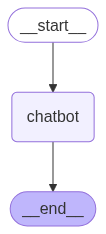

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [10]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

user_input = ""
while "quit" and "\q" not in user_input.lower():
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: How LangGraph differs from LangChain
Assistant: Here are the key differences between LangGraph and LangChain:

1. Purpose and Focus:
- LangGraph: Specifically designed for creating stateful, multi-step AI applications using graph-based workflows
- LangChain: A broader framework for building applications with LLMs through composable components

2. State Management:
- LangGraph: Built-in state management capabilities, making it easier to handle complex, stateful interactions
- LangChain: Basic state management, primarily focused on chaining operations

3. Flow Control:
- LangGraph: Uses explicit graph structures to define workflow transitions and logic
- LangChain: Linear chains and basic branching through conditional logic

4. Use Cases:
- LangGraph:
  * Multi-turn conversations
  * Complex decision trees
  * State machines
  * Interactive applications
- LangChain:
  * Document processing
  * Question answering
  * Summarization
  * Basic chatbots

5. Structure:
- LangGraph: Graph

In [11]:
!pip install -U langchain-tavily

In [12]:
_set_env("TAVILY_API_KEY")

In [13]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
   'title': "Introduction to LangGraph: A Beginner's Guide - Medium",
   'content': '*   **Stateful Graph:** LangGraph revolves around the concept of a stateful graph, where each node in the graph represents a step in your computation, and the graph maintains a state that is passed around and updated as the computation progresses. LangGraph supports conditional edges, allowing you to dynamically determine the next node to execute based on the current state of the graph. Image 10: Introduction to AI Agent with LangChain and LangGraph: A Beginner’s Guide Image 18: How to build LLM Agent with LangGraph\u200a—\u200aStateGraph and Reducer Image 20: Simplest Graphs using LangGraph Framework Image 24: Building a ReAct Agent with Langgraph: A Step-by-Step Guide Image 28: Building an Ag